In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install google-cloud-vision==1.00

In [ ]:
!pip install google-cloud

In [ ]:
import os, io
from google.cloud import vision
from google.cloud.vision import types
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


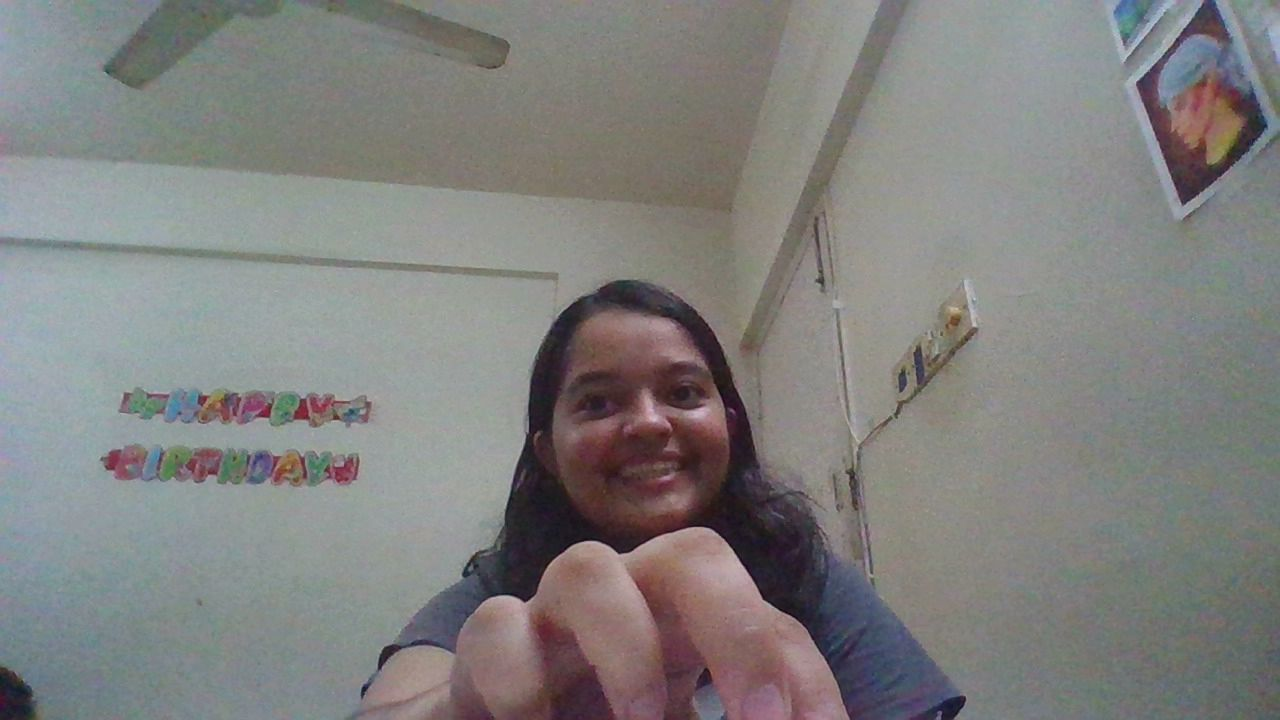

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=r'ServiceAccountToken.json'
client = vision.ImageAnnotatorClient()

IMAGE_FILE =filename
FOLDER_PATH= r''
IMAGE_PATH=os.path.join(FOLDER_PATH, IMAGE_FILE)

with io.open(IMAGE_PATH, 'rb') as image_file:
    content = image_file.read()

image=vision.types.Image(content=content)
response=client.face_detection(image=image)
faceAnnotations=response.face_annotations
likelihood=('Unkown', 'Very Unlikely','Unlikely','Possibly', 'Very Likely', 'Likely' )

print('Faces:')
for face in faceAnnotations:
    print('Detection Confidence: {0}'.format(face.detection_confidence))
    print('Angry Likelihood: {0}'.format(likelihood[face.anger_likelihood]))
    print('Joy Likelihood: {0}'.format(likelihood[face.joy_likelihood]))
    print('Surprise Likelihood: {0}'.format(likelihood[face.surprise_likelihood]))
    print('Sorrow Likelihood: {0}'.format(likelihood[face.sorrow_likelihood]))

    #face_vertices=['({0}, {1})'.format(vertex.x, vertex.y) for vertex in face.bounding_poly.vertices]
    #print('Face Bound: {0}'.format(', '.join(face_vertices)))

Faces:
Detection Confidence: 0.9539426565170288
Angry Likelihood: Very Unlikely
Joy Likelihood: Likely
Surprise Likelihood: Very Unlikely
Sorrow Likelihood: Very Unlikely
Headwear Likelihood: Very Unlikely
